Defining the generating function.

In [27]:
Reg_fun <-function(x){
   5*sin(x)+23*cos(x)^2
}

Setting the seed.


[1] 13.69519

In [28]:
set.seed(475)

Generating the data

In [29]:
X <- runif(100,5,15)
Y <- Reg_fun(X)+rnorm(100,0,5)

Drawing the scatterplot of $X$ vs $Y$ alongside the underlying regression function.

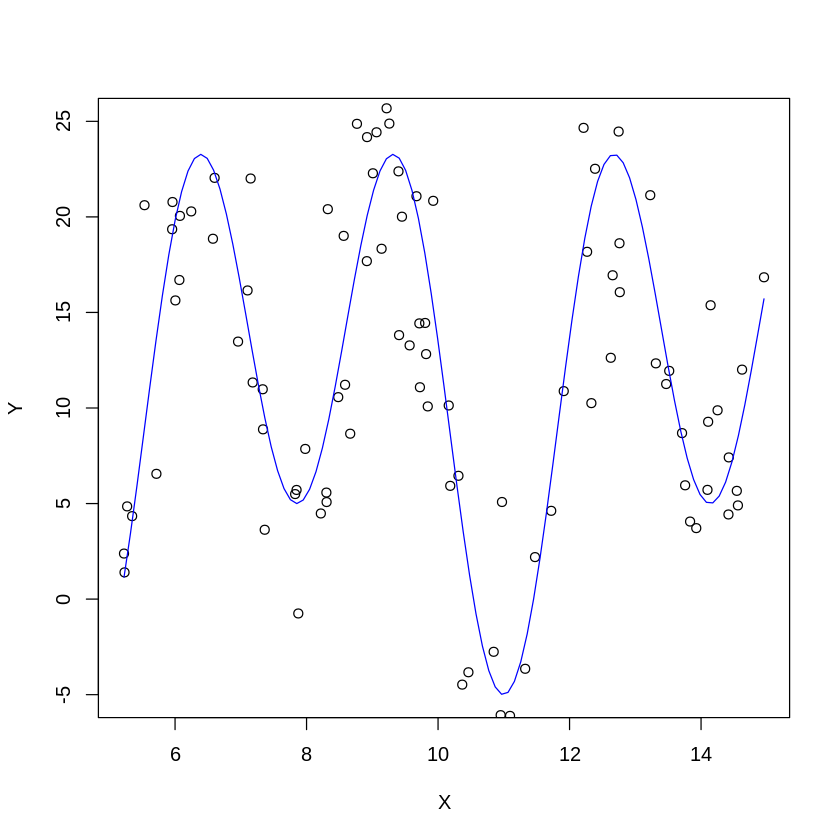

In [30]:
plot(X,Y,ylim=c(-5,25))
curve(Reg_fun,add=TRUE,col="blue")

Fitting a cube through the data

In [31]:
lm_cube <- lm(Y~X+I(X^2)+I(X^3))
summary(lm_cube)


Call:
lm(formula = Y ~ X + I(X^2) + I(X^3))

Residuals:
    Min      1Q  Median      3Q     Max 
-21.160  -6.518   0.409   6.648  18.244 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -43.33480   45.94488  -0.943    0.348
X            19.67420   15.15215   1.298    0.197
I(X^2)       -2.08914    1.58953  -1.314    0.192
I(X^3)        0.06842    0.05320   1.286    0.202

Residual standard error: 9.028 on 96 degrees of freedom
Multiple R-squared:  0.04925,	Adjusted R-squared:  0.01954 
F-statistic: 1.658 on 3 and 96 DF,  p-value: 0.1813


Fitting a cube with the "poly" function.

In [32]:
lm_poly_cube <- lm(Y~poly(X,degree=3,raw=TRUE))
summary(lm_poly_cube)


Call:
lm(formula = Y ~ poly(X, degree = 3, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-21.160  -6.518   0.409   6.648  18.244 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)
(Intercept)                      -43.33480   45.94488  -0.943    0.348
poly(X, degree = 3, raw = TRUE)1  19.67420   15.15215   1.298    0.197
poly(X, degree = 3, raw = TRUE)2  -2.08914    1.58953  -1.314    0.192
poly(X, degree = 3, raw = TRUE)3   0.06842    0.05320   1.286    0.202

Residual standard error: 9.028 on 96 degrees of freedom
Multiple R-squared:  0.04925,	Adjusted R-squared:  0.01954 
F-statistic: 1.658 on 3 and 96 DF,  p-value: 0.1813


**Conclusion:** *We can easily fit polynomial of any degrees to the data using the "poly" function*.



Now run the following code in your computer.

In [33]:
rm(list=ls())

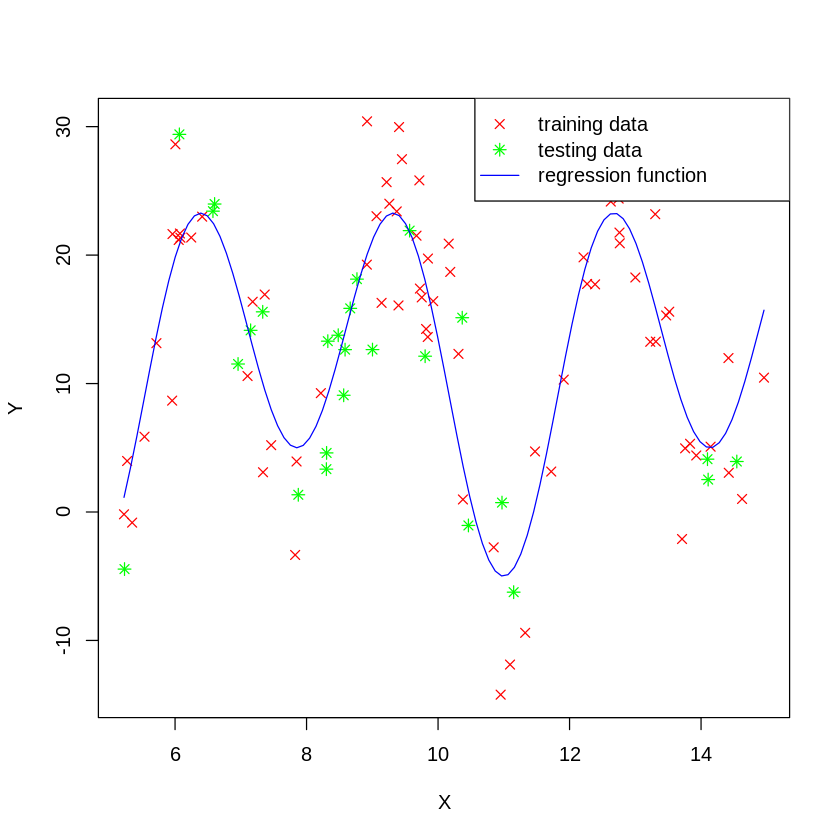

In [34]:

set.seed(475) #set your roll number as the seed.

#defining the regression function
Reg_fun <-function(x){
   5*sin(x)+23*cos(x)^2
}
#Generating the simulated dataset

X <- runif(100,5,15)
Y <- Reg_fun(X)+rnorm(100,0,5)

#70-30 Train-Test split

sample <- sample(c(TRUE, FALSE), length(X), replace=TRUE, prob=c(0.7,0.3))
X.train  <- X[sample]
X.test   <- X[!sample]
Y.train <- Y[sample]
Y.test <- Y[!sample]
Train.set <- data.frame(X=X.train,Y=Y.train)
#Test.set <- data.frame(X=X.test,Y=Y.test)
#ploting the dataset

plot(X.train,Y.train,pch=4,col="red",xlab="X",ylab="Y")
points(X.test,Y.test,pch=8,col="green")
curve(Reg_fun,col="blue",add=TRUE)
legend("topright",c("training data","testing data","regression function"),lty=c(0,0,1),pch=c(4,8,NA),col=c("red","green","blue"))

Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.train)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.test)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.train)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.test)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.train)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.test)):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(lm.pol, newdata = data.frame(X = X.train)):
“prediction from 

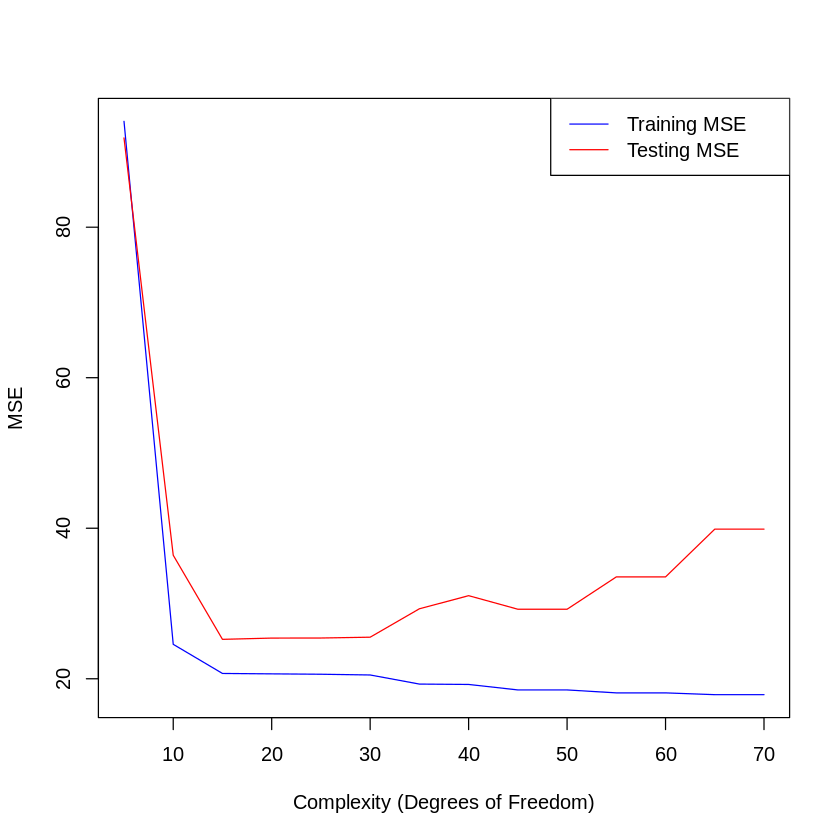

In [35]:

#fixing the possible degrees of the polynomials
deg_val <- seq(5,70,by=5)

#initialising
mse.train <- c()
mse.test  <- c()

#Trainin and testing MSE
for(l in deg_val){
  # Fit model on training set using raw polynomials
  lm.pol <- lm(Y ~ poly(X, degree = l, raw = TRUE), data = Train.set)

  # Predict on training and test sets
  tr.pr <- predict(lm.pol, newdata = data.frame(X = X.train))
  te.pr <- predict(lm.pol, newdata = data.frame(X = X.test))

  #calculating training and testing MSE
  mse.tr <- mean((Y.train-tr.pr)^2)
  mse.te <- mean((Y.test-te.pr)^2)
  print
  # Store the MSEs.
  mse.train <- c(mse.train,mse.tr)
  mse.test <- c(mse.test, mse.te)
}
plot(deg_val,mse.train,type="l",col="blue",xlab="Complexity (Degrees of Freedom)",ylab="MSE")
lines(deg_val,mse.test,type="l",col="red")
legend("topright",c("Training MSE","Testing MSE"),lty=1,col=c("blue","red"))


In [36]:
rm(list=ls())

In [43]:
Reg_fun <-function(x){
   5*sin(x)+23*cos(x)^2
}
seed <- 475 #set your roll number
deg_val <- seq(5,70,by=5)
X.test <- runif(50,5,15)
Y.test <- Reg_fun(X.test)+rnorm(50,0,5)
Test.set <- data.frame(X=X.test,Y=Y.test)
Train.MSE <-c()
Test.MSE <- c()
Test.at.12 <- c()
for(i in 1:50){
  set.seed(seed+(i-1)*40)
  X.train <- runif(200,5,15)
  Y.train <- Reg_fun(X.train)+rnorm(200,0,5)
  Train.set <- data.frame(X=X.train,Y=Y.train)

  #initialising
  mse.train <- c()
  mse.test  <- c()
  test.12 <- c()
  #Trainin and testing MSE
  for(l in deg_val){
    # Fit model on training set using raw polynomials
    lm.pol <- lm(Y ~ poly(X, degree = l, raw = TRUE), data = Train.set)
    #Here as we fit the model for different dataset we get different coefficients each time so we get different values for X=12 for each different seed

    suppressWarnings({
    # Predict on training and test sets
    tr.pr <- predict(lm.pol, newdata = data.frame(X = X.train))
    te.pr <- predict(lm.pol, newdata = data.frame(X = X.test))
    te.pr.12 <- predict(lm.pol, newdata = data.frame(X = 12))
    })
    #calculating training and testing MSE
    mse.tr <- mean((Y.train-tr.pr)^2)
    mse.te <- mean((Y.test-te.pr)^2)

    # Store the MSEs.
    mse.train <- c(mse.train,mse.tr)
    mse.test <- c(mse.test, mse.te)
    test.12 <- c(test.12,te.pr.12)
  }
  Train.MSE <-rbind(Train.MSE,mse.train)
  Test.MSE <- rbind(Test.MSE,mse.test)
  Test.at.12 <- rbind(Test.at.12,test.12)
}
colnames(Train.MSE)=paste("deg",deg_val,sep="=")
colnames(Test.MSE)=paste("deg",deg_val,sep="=")
colnames(Test.at.12)=paste("deg",deg_val,sep="=")

       1 
10.04954 
      1 
9.93353 
      1 
10.9077 
       1 
11.00544 
       1 
11.74586 
       1 
12.03209 
       1 
12.07045 
       1 
12.07045 
       1 
11.83517 
       1 
12.14711 
       1 
12.14711 
       1 
11.58211 
       1 
11.72626 
       1 
11.72626 
       1 
12.52194 
       1 
13.39261 
       1 
15.13876 
       1 
16.58849 
       1 
16.41593 
      1 
16.4639 
      1 
16.4639 
       1 
16.65261 
       1 
17.14135 
      1 
17.1389 
      1 
17.1389 
       1 
17.24196 
       1 
17.24196 
    1 
17.35 
       1 
10.98137 
       1 
13.10378 
       1 
14.95867 
       1 
16.23415 
       1 
16.28885 
       1 
15.87371 
       1 
16.07853 
       1 
16.07853 
       1 
15.45387 
       1 
15.56417 
       1 
15.56417 
      1 
15.8799 
       1 
15.61848 
       1 
15.61848 
       1 
12.50774 
       1 
12.75476 
       1 
14.47022 
       1 
14.33862 
       1 
14.68616 
       1 
14.71441 
       1 
14.64549 
       1 
14.64549 
       1 
15.09051 


In [45]:
Test.at.12

,deg=5,deg=10,deg=15,deg=20,deg=25,deg=30,deg=35,deg=40,deg=45,deg=50,deg=55,deg=60,deg=65,deg=70
test.12,10.049538,9.933530,10.90770,11.00544,11.74586,12.03209,12.07045,12.07045,11.835174,12.147106,12.147106,11.582110,11.72626,11.72626
test.12,12.521941,13.392614,15.13876,16.58849,16.41593,16.46390,16.46390,16.65261,17.141347,17.138904,17.138904,17.241961,17.24196,17.35000
test.12,10.981369,13.103782,14.95867,16.23415,16.28885,15.87371,16.07853,16.07853,15.453867,15.564171,15.564171,15.879899,15.61848,15.61848
test.12,12.507740,12.754757,14.47022,14.33862,14.68616,14.71441,14.64549,14.64549,15.090512,14.878095,14.878095,14.632466,14.51819,14.51819
test.12,10.841693,12.814122,14.24000,14.12558,14.29854,14.48334,14.51470,14.51470,14.557194,14.630010,14.799503,14.799503,14.63747,14.63747
test.12,11.058310,10.502252,12.32835,12.73467,12.38231,11.48107,11.53732,11.53732,12.243985,12.237895,12.237895,12.057711,12.41659,12.41659
test.12,9.187865,11.338163,13.67680,14.44974,14.20246,14.35235,14.51175,14.51175,13.866529,13.713608,13.713608,13.572368,13.43121,13.43121
test.12,10.408817,11.160212,12.93248,13.21986,13.59993,13.97894,13.81560,13.81560,13.356334,13.051745,13.051745,13.210482,13.20116,13.20116
test.12,8.852507,9.742125,12.40110,12.89795,13.42926,13.43940,13.44959,13.44959,13.242971,13.242533,13.242533,13.259586,13.33946,13.33946
test.12,13.408522,12.690907,13.82378,13.62462,13.72000,14.10729,13.89718,13.89718,14.124960,14.012278,14.012278,13.891468,13.78243,13.78243


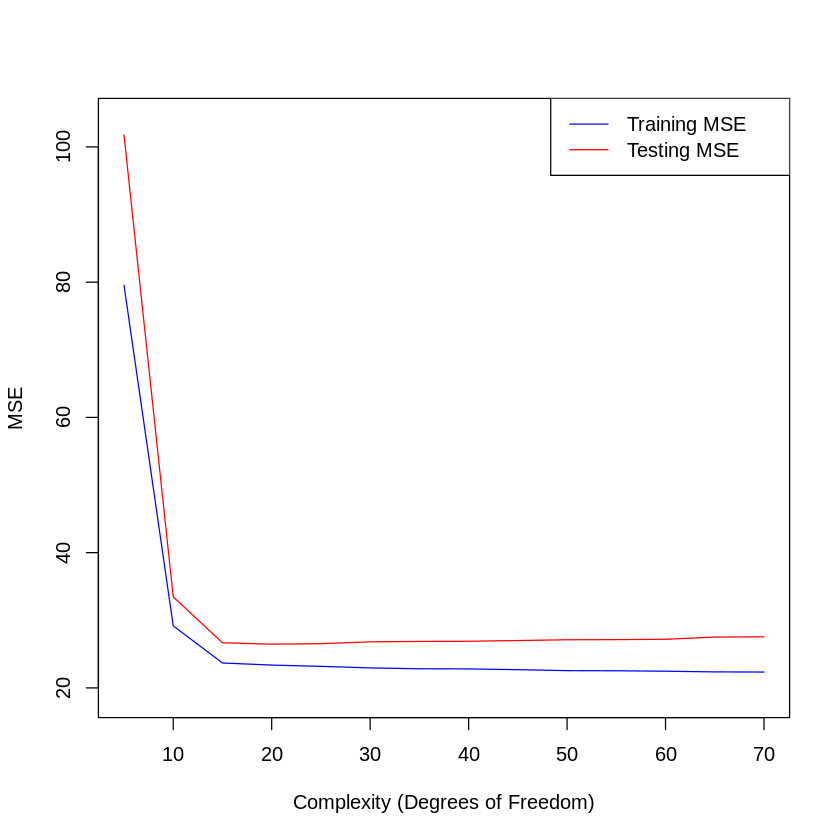

In [38]:
Train.mse.av <- apply(Train.MSE,2,mean)
Test.mse.av <- apply(Test.MSE,2,mean)
plot(deg_val,Test.mse.av,type="l",col="red",xlab="Complexity (Degrees of Freedom)",ylab="MSE",ylim=c(19,max(c(Train.mse.av,Test.mse.av))+2))
lines(deg_val,Train.mse.av,type="l",col="blue")
legend("topright",c("Training MSE","Testing MSE"),lty=1,col=c("blue","red"))


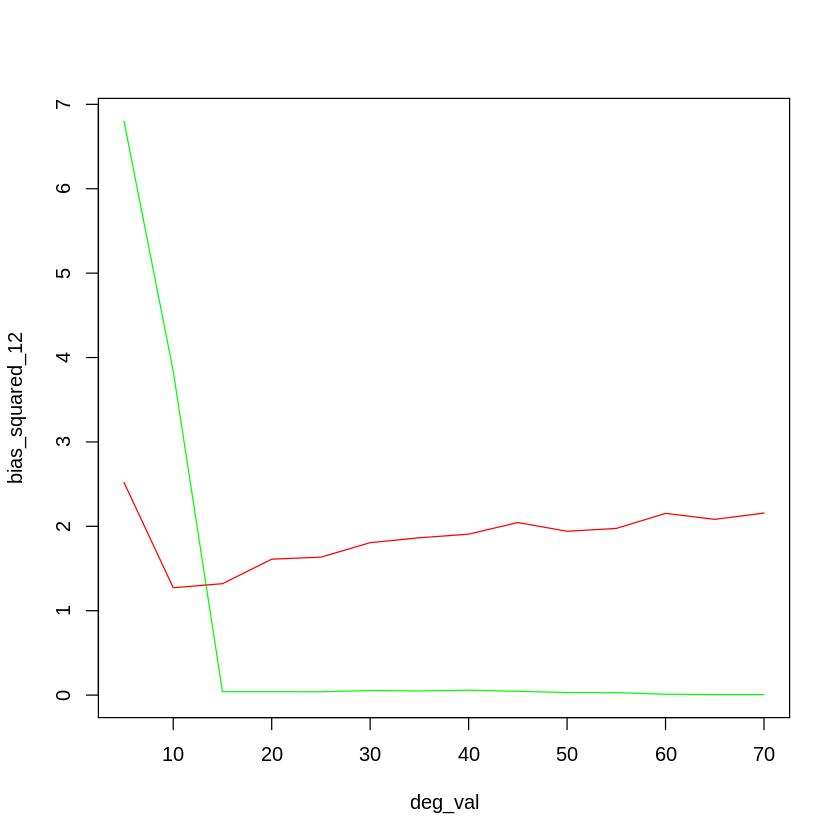

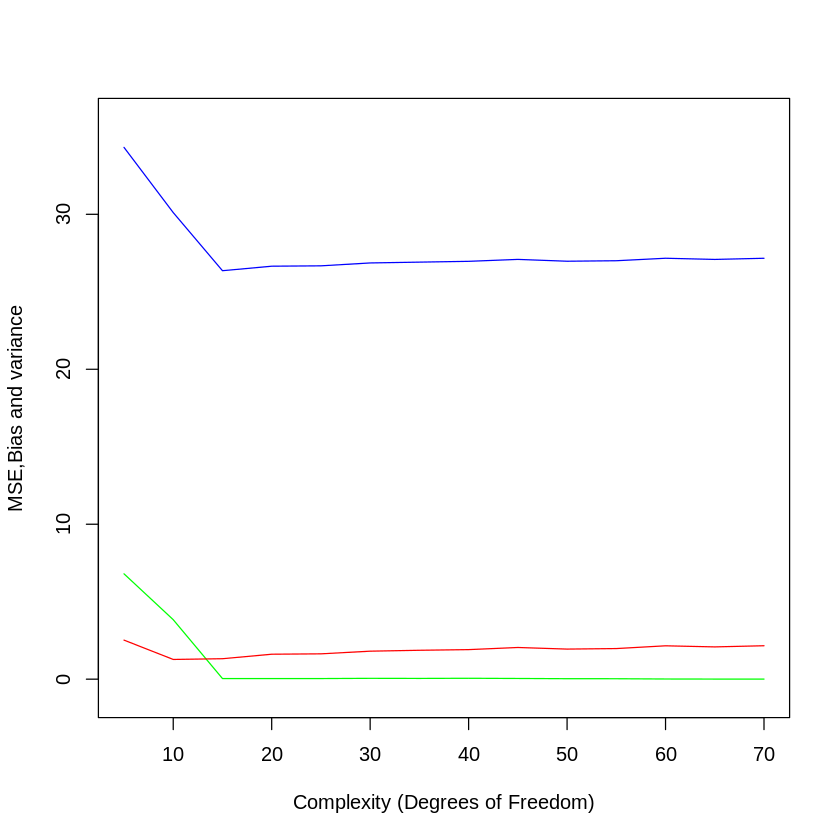

In [39]:
val.12 <- Reg_fun(12)
mean.12 <- apply(Test.at.12,2,mean)
var.12 <- apply(Test.at.12,2,var)
bias_squared_12 <- (mean.12-val.12)^2
mse.12 <- var.12+bias_squared_12+5^2

plot(deg_val,bias_squared_12,type="l",col="green")
lines(deg_val,var.12,type="l",col="red")

plot(deg_val,bias_squared_12,type="l",col="green",ylim=c(-1,36),xlab="Complexity (Degrees of Freedom)",ylab="MSE,Bias and variance")
lines(deg_val,var.12,type="l",col="red")
lines(deg_val,mse.12,type="l",col="blue")

In [40]:
data.frame(X = 12)

X
<dbl>
12
